# 1장 딥러닝이란?

## 1-1. 인공 지능과 머신 러닝, 딥러닝
### 1-1-1. 인공 지능
: 보통의 사람이 수행하는 지능적인 작업을 자동화하는 것
### 1-1-2. 머신 러닝
데이터에서 통계적 구조를 찾아 그 작업을 자동화하기 위한 규칙을 만들어 내서 훈련시키는 것
### 1-1-3. 데이터에서 표현을 학습하기
**데이터 처리 작업을 위한 실행 규칙을 찾는 것**

> 머신 러닝을 하기 위한 세 가지 조건
- 입력 데이터 포인트 : 입력되는 데이터의 종류(ex. 사진, 이미지, 음성 등)
- 기대 출력 : 입력된 데이터를 토대로 예상되는 결과
- 알고리즘의 성능을 측정하는 방법

> 머신 러닝과 딥러닝의 핵심 문제

의미 있게 데이터를 변환하는 것  
즉, **기대 출력에 가까워지도록 입력 데이터의 유용한 표현(representation)을 학습**하는 것

> 머신 러닝에서의 '학습'의 의미

유용한 데이터 표현을 만드는 데이터 변환을 피드백 신호를 바탕으로 자동으로 탐색하는 과정 -> 문제를 더 간단한 규칙으로 해결

> 요약

머신 러닝은 가능성 있는 공간(가설 공간)을 사전에 정의하고 피드백 신호의 도움을 받아 **입력 데이터에 대한 유용한 변환과 규칙을 찾는 것**이다.

### 1-1-4. 딥러닝
다른 표현 : **층 기반 표현 학습** 또는 **계층적 표현 학습**

**심층 신경망** : 정보가 연속된 필터를 통과하면서 순도 높게(어떤 작업에 대해 유용하게) 정제되는 **다단계 정보 추출 과정**  

> 요약

데이터 표현을 학습하기 위한 다단계 처리 방식(연속된 층 즉, 신경망을 이용)

### 1-1-5. 딥러닝의 작동 원리 이해하기
입력 데이터를 처리하는 방식 : **가중치(파라미터, param)**

**학습** :  주어진 입력을 정확한 타깃에 매핑하기 위해 신경망의 모든 층에 있는 가중치 값을 찾는 것

> 기본적인 딥러닝 방식

손실 함수를 피드백 신호로 사용하여 현재 샘플의 **손실 점수가 감소되는 방향으로 가중치 값을 조슴씩 수정하는 것** => **옵티마이저**

# 2장 신경망의 수학적 구성 요소

## 2-1. 신경망과의 첫 만남

In [98]:
from tensorflow.keras.datasets import mnist

In [99]:
# 데이터 적재하기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [100]:
train_images.shape

(60000, 28, 28)

In [101]:
len(train_labels)

60000

In [102]:
test_images.shape

(10000, 28, 28)

In [103]:
len(test_labels)

10000

이미지와 레이블은 **일대일** 관계임을 알 수 있다.

In [104]:
'''
라인 크기를 설정하는 옵션 코드
np.set_printoptions(livewidth= 28*28)

숫자가 작을수록 어두움
print(train_imags[0])

이미지를 보여주는 코드
plt.imshow(train_images[0], cmap='gray')
'''

"\n라인 크기를 설정하는 옵션 코드\nnp.set_printoptions(livewidth= 28*28)\n\n숫자가 작을수록 어두움\nprint(train_imags[0])\n\n이미지를 보여주는 코드\nplt.imshow(train_images[0], cmap='gray')\n"

Sparse Matrixs : 희소 행렬  
Dense Matrixs : 밀집 행렬

In [105]:
# 신경망 만들기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [106]:
'''
다른 코드

model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''

"\n다른 코드\n\nmodel = Sequential()\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

### 컴파일 단계에 포함되는 세 가지
- 옵티마이저(**optimizer**) : 성능을 향상시키기 위해 입력된 데이터를 기반으로 모델을 업데이트하는 메커니즘
- 손실 함수(**loss**) : 훈련 데이터에서 모델의 성능을 측정하는 방법(모델이 옳은 방향으로 학습될 수 있도록 도움)
- 훈련과 테스트 과정을 모니터링할 지표(**metrics**) : 평가 방법

In [107]:
# 컴파일 과정
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 스케일 조정을 하는 이유
1. 신경망은 입력 데이터의 스케일에 민감하여 적절한 데이터 전처리 과정 (**모든 값: 0과 1 사이**)이 필요함  
2. **이미지**의 경우 보통 **픽셀의 최댓값**이 **255로 나누어** 사용함
3. 컴퓨터는 소수가 더 편함

In [108]:
# 스케일 조정
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [109]:
# 모델 훈련하기
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2650 - accuracy: 0.9235
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1096 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0717 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0516 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0389 - accuracy: 0.9883


'**batch**'는 '**한 묶음**'을 의미  
즉, 한 묶음을 몇 개로 잡을지 지정하는 것임

In [110]:
# 예측하기
preds = model.predict(train_images)
preds

1875/1875 [==============================] - 1s 650us/step


array([[1.0129173e-10, 2.4607757e-10, 1.3164407e-07, ..., 7.5031172e-09,
        3.2251227e-10, 6.1127531e-10],
       [9.9999690e-01, 2.0357922e-11, 3.0455844e-06, ..., 6.0862354e-10,
        1.7354009e-10, 2.0973068e-09],
       [1.9361705e-08, 2.5068457e-06, 2.0894287e-04, ..., 3.3313819e-04,
        1.8416778e-05, 1.2441248e-03],
       ...,
       [7.5973424e-13, 1.8501932e-10, 2.2167207e-13, ..., 1.9177030e-12,
        1.8627690e-08, 7.8524405e-09],
       [7.7662058e-05, 3.5794076e-06, 7.1329327e-05, ..., 1.6874830e-07,
        8.8635937e-07, 3.5815010e-08],
       [3.5803907e-05, 1.3567816e-06, 1.5372135e-04, ..., 5.6268502e-05,
        9.9948883e-01, 1.6759435e-04]], dtype=float32)

In [111]:
preds[0].argmax() # 모델의 예측 결과 : 인덱스 5 에서 가장 높은 확률 값을 얻음

5

In [112]:
preds[0][5] # 예측 확률 : 거의 1임

0.96225154

In [113]:
test_labels[0] # 테스트 데이터의 레이블과 맞는지 확인하기

7

In [114]:
# 새로운 데이터에서 모델 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'손실 함수 : {test_loss}, 정확도 : {test_acc}')

313/313 [==============================] - 0s 730us/step - loss: 0.0658 - accuracy: 0.9805
손실 함수 : 0.06576141715049744, 정확도 : 0.9804999828338623


훈련 정확도와 테스트 정확도 사이의 차이는 **과대적합**(overfitting) 때문인데, 
이는 **머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향**을 말한다.

### 최소코드

In [115]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

model.fit(train_images, train_labels, epochs=5, batch_size=128)

preds = model.predict(test_images)

loss, acc = model.evaluate(test_images, test_labels)
print(f' 손실 : {loss}, 정확도 : {acc}')

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2644 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1075 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0709 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 0s 712us/step - loss: 0.0743 - accuracy: 0.9780
 손실 : 0.07434381544589996, 정확도 : 0.9779999852180481


## 2-2. 신경망을 위한 데이터 표현

- 1차원 배열 : 벡터
- 2차원 배열 : 행렬
- 3차원 이상의 배열 : 텐서  
  
**텐서**는 가장 큰 개념으로, **Numpy**에서는 **array**라고 불린다.  
 
> 요약 : 
**벡터 < 행렬 < 텐서 = np.array**

> 랭크(rank) = 차원(dimension) = 축(axis)

### 2-2-1. 스칼라(랭크-0 텐서 or 0D 텐서)
: 하나의 숫자만 담고 있는 텐서

In [2]:
import numpy as np

In [4]:
x = np.array(12)
x.ndim # 넘파이 배열의 축 개수 확인하기 - 스칼라

0

In [3]:
a = np.random.randint(-5, 5, 3)
b = np.random.randint(-5, 5, 3)
np.dot(a,b) # 스칼라

7

### 2-2-2. 벡터(랭크-1 텐서 or 1D 텐서)
: 딱 하나의 축을 가진 텐서

In [25]:
y = np.array([12, 3, 6, 14, 7])
y

array([12,  3,  6, 14,  7])

In [26]:
y.ndim

1

5개의 원소를 가지고 있으므로 **5차원 벡터** 라고 부른다.  

> **주의할 점**  
> 5D 벡터와 5D 텐서를 혼동하지 말자.  
> 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고, 5D 텐서는 5개의 축을 가진 것임

### 2-2-3. 행렬(랭크-2 텐서 or 2D 텐서)
: 행과 열로 이루어진 텐서

In [27]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [28]:
x.ndim

2

### 2-2-4. 랭크-3 텐서와 더 높은 랭크의 텐서(or 3D 텐서)

In [29]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [30]:
x.ndim

3

### 2-2-5. 텐서 핵심 속성
- **축의 개수(랭크)** : ndim 속성으로 확인
- **크기(shape)** : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지?
- **데이터 타입(dtype)** : ex. float16, float32, float64, unit8 등 텐서플로에서는 string 텐서를 사용하기도 함

In [31]:
# 예시
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
# train_images 배열의 축의 개수 확인
train_images.ndim

3

In [34]:
# train_images 배열의 크기 확인
train_images.shape

(60000, 28, 28)

shape 결과값은 <span style="color: #2D3748; background-color:#fff5b1;">(사진의 장 수, height, width, (color_depth))</span>을 의미  

In [35]:
# 데이터 타입 확인
train_images.dtype

dtype('uint8')

unit8 은 "**unsigned int 8**" 의 줄임말  
  
  특징) 양수 표현만 가능하다, **2^8**개수만큼 표현이 가능하다, **0 ~ 255**

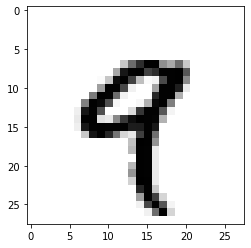

In [38]:
# 데이터셋에 있는 다섯 번째 샘플 출력하기
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [39]:
# 이미지에 해당하는 레이블 확인
train_labels[4]

9

### 2-2-6. 넘파이로 텐서 조작하기
- 11번째에서 101번째까지(101번째 포함하지 않음)  숫자를 선택하여 (90, 28, 28) 크기의 배열을 만들어보자.

In [41]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [43]:
my_slice = train_images[10:100, 0:28, 0: 28]
my_slice.shape

(90, 28, 28)

- 일반적으로 각 배열의 축을 따라 어떤 인덱스 사이도 선택할 수 있음

In [44]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

- 음수 인덱스 사용 가능

In [45]:
my_slice = train_images[:, 7:-7, 7: -7]
my_slice.shape

(60000, 14, 14)

### 2-2-7. 배치 데이터

일반적으로 딥러닝에서 사용하는 **모든 데이터 텐서의 첫 번째 축**은 **샘플 축**(sample axis, **샘플 차원**(sample dimension))이라고 한다.  
mnist 예제에서는 숫자 이미지가 샘플이다.  
딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않고, 작은 배치로 나눈다.  
  
n번째 배치는  
n = 3  
<span style="color: #2D3748; background-color:#fff5b1;">batch = train_images[128 * n : 128 * (n+1)]</span>  
으로 나타낸다.  
  
이런 **배치 데이터**를 다룰 때 **첫 번째 축**(0번 축)은 **배치 축**(batch axis) 또는 **배치 차원**(batch dimension)이라고 부른다.  

### 2-2-8. 텐서의 실제 사례
- **벡터 데이터** : (samples, features) 크기의 랭크-2 텐서
- **시계열 데이터 또는 시퀀스 데이터** : (samples, timesteps, features) 크기의 랭크-3 텐서, 각 샘플은 특성 벡터의 (길이가 timesteps인) 시퀀스임
- **이미지** : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 랭크-4 텐서
- **동영상** : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 랭크-5 텐서

### 2-2-9. 벡터 데이터
- 첫 번째 축 : **샘플 축**
- 두 번째 축 : **특성 축(feature axis)**
  
ex) 사람의 나이, 성별, 소득으로 구성된 인구 통계 데이터가 있다. 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터 셋은 (100000, 3) 크기의 랭크-2 텐서에 저장될 수 있다.

### 2-2-10. 시계열 데이터 또는 시퀀스 데이터

시간이 (또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 랭크-3 텐서로 저장된다.  
관례적으로 **시간 축은 항상 두 번째**(인덱스가 1인 축)이다.

### 2-2-11. 이미지 데이터

이미지는 전형적으로 **높이, 너비, 컬러 채널**의 **3차원**으로 이루어진다.  
- **흑백** 이미지 : '명도'라는 1가지 속성만 가지고 있기 때문에 컬러 채널의 크기는 1임(128, 256, 256, **1**)  
- **컬러** 이미지: 'RGB'처럼 3가지의 컬러 채널을 가지고 있기 때문에 컬러 채널의 크기는 3임(128, 256, 256, **3**)

### 2-2-12. 비디오 데이터
현실에서 랭크-5 텐서가 필요한 몇 안 되는 데이터 중 하나이다.  
여러 비디오의 배치는 (**samples, frames, height, width, color_depth**)로 저장될 수 있다.  
  
ex) 60초 짜리 144 x 256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 -> (4, 240, 144, 256, 3) 크기의 텐서에 저장될 것이다.

## 2-3. 신경망의 톱니바퀴: 텐서 연산
심층 신경망이 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 **텐서 연산**(tensor operation)(또는 텐서 함수(tensor function))으로 나타낼 수 있다.  
ex) 텐서 덧셈, 텐서 곱셈 등  
  
### relu 활성화 함수
- 음수를 0으로 만드는 함수, 즉 입력이 0보다 크면 입력을 그대로 반환하고 0보다 작으면 0을 반환함
- **output = relu(dot(W, input) + b)**  / W : 행렬, b : 벡터
- **np.maximum(0, x)**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(-1, 1, 1000) # -1 부터 1 까지 1000등분

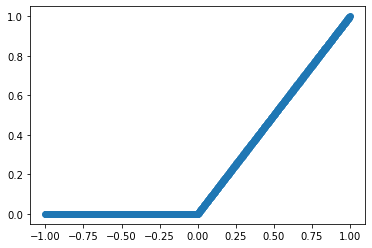

In [14]:
plt.scatter(x, np.maximum(0, x))

In [15]:
a = np.random.randint(-5, 5, 3)
b = np.random.randint(-5, 5, 3)
output = np.maximum(0, (np.dot(a, b) + 2))
output

0

**relu 활성화 함수**에 사용된 **3개의 텐서 연산**에 대해 좀 더 자세히 알아보자.
- 입력 텐서와 텐서 W 사이의 점곱(dot, dot product, 내적)
- 점곱으로 만들어진 행렬과 벡터 b 사이의 덧셈(+)
- relu 연산. relu(x)는 max(0, x)

### 2-3-1. 원소별 연산
  
relu 함수와 덧셈은 **원소별 연산**(element-wise operation)이다. 이 연산은 <span style='background-color: #f5f0ff'>텐서에 있는 각 원소에 **독립적**으로 적용</span>된다.  
파이썬으로 단순한 원소별 연산을 구현한다면 다음 relu 연산 구현처럼 for문을 사용할 것이다.

In [27]:
def naive_relu(x):
    assert len(x.shape) == 2 # x는 랭크-2 넘파이 배열
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) # relu
    return x

덧셈도 동일하다.

In [35]:
def naive_add(x,y):
    assert len(x.shape) == len(y.shape)
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i ,j] += x[i, j]
    return x

같은 원리로 원소별 곱셈, 뺄셈 등을 할 수 있다.  
사실 넘파이 배열을 다룰 때는 최적화된 넘파이 내장 함수로 이런 연산들을 처리할 수 있고, 엄청나게 빠르다.

In [29]:
import numpy as np

z = x + y # 원소별 덧셈
z = np.maximum(z, 0.) # 원소별 렐루 함수

In [30]:
# 실제 시간 차이 재기
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f'걸린 시간 : {time.time() - t0}s')

걸린 시간 : 0.006979942321777344s


In [36]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f'걸린 시간 : {time.time() - t0}s')

걸린 시간 : 1.9956636428833008s


## 2-3-2. 브로드캐스팅
모호하지 않고 실행 가능하다면 **작은 텐서가 큰 텐서의 크기에 맞춰짐**을 의미

> 단계 : 큰 텐서의 ndim에 맞도록 작은 텐서에 **축이 추가**됨 -> 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨  
  
> 차원을 바꾸는 세 가지 방법

In [37]:
a = np.random.randint(1, 5, 6)
a

array([2, 3, 4, 4, 3, 2])

In [38]:
a.shape

(6,)

In [39]:
a.reshape((6, 1))

array([[2],
       [3],
       [4],
       [4],
       [3],
       [2]])

#### reshape

In [40]:
a.reshape((6, 1)).shape

(6, 1)

#### np.newaxis

In [42]:
a[:, np.newaxis].shape

(6, 1)

#### expand_dims

In [43]:
np.expand_dims(a, axis = 0)

array([[2, 3, 4, 4, 3, 2]])

In [44]:
np.expand_dims(a, axis = 0).shape

(1, 6)

In [45]:
np.expand_dims(a, axis = 1)

array([[2],
       [3],
       [4],
       [4],
       [3],
       [2]])

In [46]:
np.expand_dims(a, axis = 1).shape

(6, 1)

#### 기타 버전

In [47]:
a = a.reshape((2,3))
a

array([[2, 3, 4],
       [4, 3, 2]])

In [48]:
a.shape

(2, 3)

Q. a.shape을 3차원으로 바꾸어 주세요.

In [49]:
# 1
a.reshape((2, 3, 1))

array([[[2],
        [3],
        [4]],

       [[4],
        [3],
        [2]]])

In [50]:
# 1-1
a.reshape((2, 3, -1))
a.reshape((2, 3, -1)).shape

(2, 3, 1)

In [51]:
# 기타1
a.reshape((2,3) + (1,)).shape

(2, 3, 1)

In [52]:
# 2
a[:, :, np.newaxis].shape

(2, 3, 1)

In [53]:
# 기타2
a[:, :, None].shape

(2, 3, 1)

### 2-3-3. 텐서 곱셈

np.dot( )

### 2-3-4. 텐서 크기 변환
텐서의 크기 변환 = **특정 크기에 맞게 행과 열을 재배열**  
  
자주 사용하는 특별한 크기 변환의 ex) **전치**(transposition)

### 2-3-6. 딥러닝의 기하학적 해석(그림(좌표)을 통해 본 분석)

결론 : **기초적인 연산**을 **길게 연결**하여 복잡한 기하학적 변환을 조금씩 분해하는 방식이다.

## 2-4. 신경망의 엔진: 그레이디언트 기반 최적화

1. 초기에는 가중치 행렬이 작은 난수로 채워져 있음(**무작위 초기화**(random initialization, 의미없는 가중치) 단계)
2. 피드백 신호에 기초하여 **가중치가 점진적으로 조정**됨

이런 <span style="color: #2D3748; background-color:#fff5b1;">가중치가 점진적으로 조정되는 과정</span>을 점진적인 조정 또는 <span style="color: #2D3748; background-color:#fff5b1;">**훈련**(**training**), **fit**, **학습** (**learning**)이라 하고, 이것이 바로 **머신 러닝 학습의 핵심**</span>이다.

# 4장 신경망 시작하기: 분류와 회귀
## 4-1. 영화 리뷰 분류: 이진 분류 문제
### 4-1-1. IMDB 데이터셋

In [53]:
# IMDB 데이터셋 로드하기
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

**num_words=10000** 매개변수 :  훈련 데이터에서 **가장 자주 나타나는 단어 1만 개만 사용하겠다**는 의미

In [54]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [55]:
train_labels[0]

1

_data : 리뷰를 담은 배열로, 각 리뷰는 단어 인덱스의 리스트  
_labels : 부정을 나타내는 0과 긍정을 나타내는 1의 리스트

In [56]:
# 가장 자주 등장하는 단어 1만 개로 제한했기 때문에 단어 인덱스는 9,999를 넘지 않음
max([max(sequence) for sequence in train_data])

9999

### 4-1-2. 데이터 준비하기

In [57]:
# 리스트를 텐서로 바꾸기 위해 멀티-핫 인코딩으로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듦
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) #  테스트 데이터를 벡터로 변환

In [58]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [59]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 4-1-3. 신경망 모델 만들기

In [60]:
# 모델 정의하기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [61]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 4-1-4. 훈련 검증
딥러닝 모델은 훈련 데이터에서 평가해서는 절대 안된다. 검증 세트를 사용하여 훈련 과정 중에 모델의 정확도를 모니터링하는 것이 표준 관행이다.

In [62]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [63]:
# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 120ms/step - loss: 0.5189 - accuracy: 0.7886 - val_loss: 0.3900 - val_accuracy: 0.8734
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3116 - accuracy: 0.9025 - val_loss: 0.3135 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2275 - accuracy: 0.9273 - val_loss: 0.2784 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1784 - accuracy: 0.9433 - val_loss: 0.2735 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1456 - accuracy: 0.9537 - val_loss: 0.2837 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1221 - accuracy: 0.9620 - val_loss: 0.3023 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.3044 - val_accuracy: 0.8866
Epoch 8/20


> **model.fit 메서드는 오브젝트, 즉 객체를 반환**한다. 이 객체는 **훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리**인 history 속성을 가지고 있다.

In [64]:
history_dict = history.history

In [65]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 4개의 항목을 담고 있다.

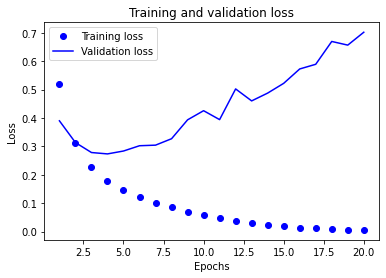

In [66]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' : 파란색 점을 의미
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' : 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

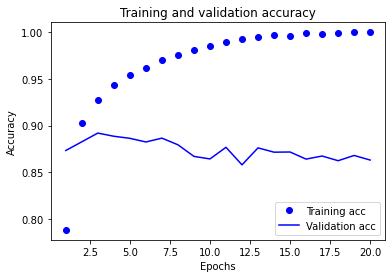

In [67]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

과대적합을 방지하기 위해 n 번째 에포크 이후에 훈련을 중지할 수 있음

In [69]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [70]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 18ms/step - loss: 0.4532 - accuracy: 0.8192
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2586 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2017 - accuracy: 0.9287
Epoch 4/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1679 - accuracy: 0.9422


In [72]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8812


In [73]:
results

[0.2980312407016754, 0.8812400102615356]

[테스트 손실, 테스트 정확도]

### 4-1-5. 훈련된 모델로 새로운 데이터에 대해 예측하기

In [74]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.15062118],
       [0.9998354 ],
       [0.8022687 ],
       ...,
       [0.09759475],
       [0.05476024],
       [0.6426509 ]], dtype=float32)

이진 분류에서 레이블이 1인 경우, 양성 샘플 / 0인 경우, 음성 샘플이다.  
이 예에서는 긍정인 리뷰가 양성 샘플이지만 어떤 좋은 것이 양성 샘플이 되는 것이 아니고 **예측하려는 대상이 양성이 된다.**

### 4-1-6. 추가 실험
1. 최종 분류 층 이전에 2개의 표현 층을 사용했다. 1개 또는 3개의 표현 층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보자.  
  
---- 층 1개 loss: 0.3134, acc: 0.8768  
---- 층 2개 loss: 0.2980, acc: 0.8812  
---- 층 3개 loss: 0.3473, acc: 0.8724

In [1]:
# 표현 층 1개
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5106 - accuracy: 0.7884 - val_loss: 0.4120 - val_accuracy: 0.8486
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3368 - accuracy: 0.8929 - val_loss: 0.3411 - val_accuracy: 0.8710
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2666 - accuracy: 0.9133 - val_loss: 0.3010 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2236 - accuracy: 0.9299 - val_loss: 0.2824 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1961 - accuracy: 0.9363 - val_loss: 0.2784 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1736 - accuracy: 0.9450 - val_loss: 0.2740 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1570 - accuracy: 0.9513 - val_loss: 0.2767 - val_accuracy: 0.8867
Epoch 8/20
30/30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

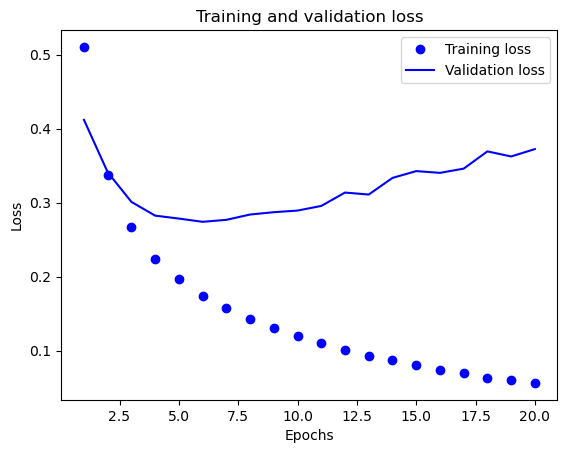

In [26]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

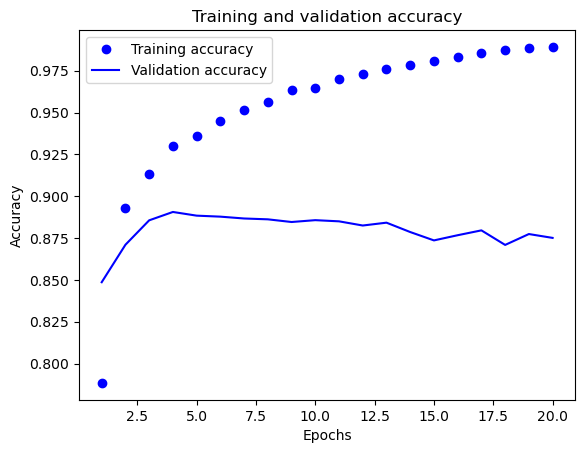

In [27]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(x_train,
          y_train,
          epochs=6,
          batch_size=512)

Epoch 1/6
49/49 [==============================] - 0s 6ms/step - loss: 0.2082 - accuracy: 0.9245
Epoch 2/6
49/49 [==============================] - 0s 6ms/step - loss: 0.1851 - accuracy: 0.9348
Epoch 3/6
49/49 [==============================] - 0s 6ms/step - loss: 0.1700 - accuracy: 0.9415
Epoch 4/6
49/49 [==============================] - 0s 6ms/step - loss: 0.1559 - accuracy: 0.9468
Epoch 5/6
49/49 [==============================] - 0s 6ms/step - loss: 0.1460 - accuracy: 0.9498
Epoch 6/6
49/49 [==============================] - 0s 6ms/step - loss: 0.1367 - accuracy: 0.9552


In [36]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 717us/step - loss: 0.3135 - accuracy: 0.8769


[0.3134995400905609, 0.8768799901008606]

------------

In [62]:
# 표현 층 3개
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [39]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [41]:
train_labels[0]

1

In [44]:
max([max(sequence) for sequence in train_data])

9999

In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [47]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [49]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [50]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

In [52]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [54]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0138 - acc: 0.9959 - val_loss: 0.6520 - val_acc: 0.8673
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0026 - acc: 0.9999 - val_loss: 0.6767 - val_acc: 0.8700
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.6934 - val_acc: 0.8693
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.7093 - val_acc: 0.8688
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0140 - acc: 0.9962 - val_loss: 0.7410 - val_acc: 0.8702
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.7385 - val_acc: 0.8679
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7628 - val_acc: 0.8680
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0117 - acc: 0

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

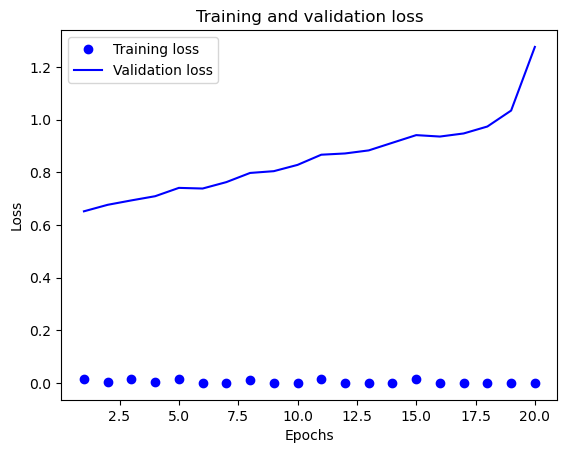

In [56]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

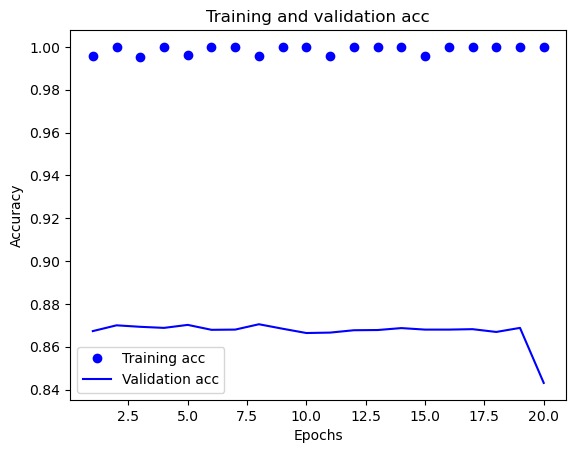

In [57]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [59]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

In [60]:
model.fit(x_train, y_train, epochs=1, batch_size=512)

49/49 [==============================] - 1s 5ms/step - loss: 0.4959 - acc: 0.7913


In [61]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 748us/step - loss: 0.3474 - acc: 0.8725


[0.34738442301750183, 0.8724799752235413]

---------------------

2. 층의 유닛을 추가하거나 줄여 보자. 32개의 유닛, 64개의 유닛 등

In [64]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [65]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i ,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [67]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [68]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

In [69]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
parial_y_train = y_train[10000:]

In [71]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0192 - acc: 0.9935 - val_loss: 0.6090 - val_acc: 0.8739
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6351 - val_acc: 0.8722
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0201 - acc: 0.9943 - val_loss: 0.6982 - val_acc: 0.8693
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6652 - val_acc: 0.8726
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6902 - val_acc: 0.8718
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0127 - acc: 0.9958 - val_loss: 0.7203 - val_acc: 0.8700
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.7276 - val_acc: 0.8715
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0011 - ac

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

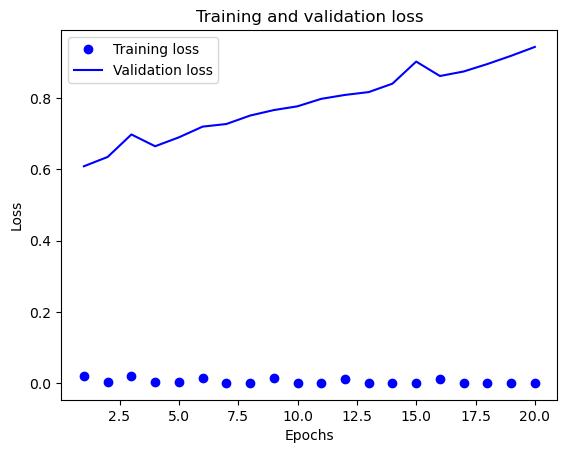

In [75]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

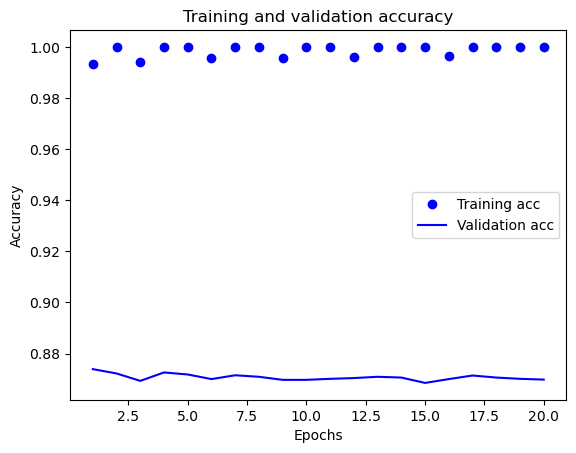

In [76]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

------------

In [77]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [78]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

In [79]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5104 - acc: 0.7586 - val_loss: 0.3539 - val_acc: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3051 - acc: 0.8853 - val_loss: 0.2917 - val_acc: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2334 - acc: 0.9115 - val_loss: 0.3080 - val_acc: 0.8746
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1896 - acc: 0.9279 - val_loss: 0.3034 - val_acc: 0.8796
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1611 - acc: 0.9415 - val_loss: 0.2978 - val_acc: 0.8808
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1332 - acc: 0.9533 - val_loss: 0.2982 - val_acc: 0.8852
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1161 - acc: 0.9565 - val_loss: 0.3099 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0847 - a

In [80]:
history_dict = history.history

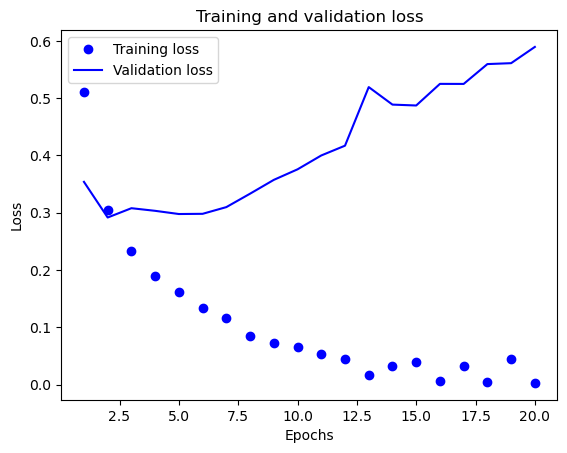

In [81]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

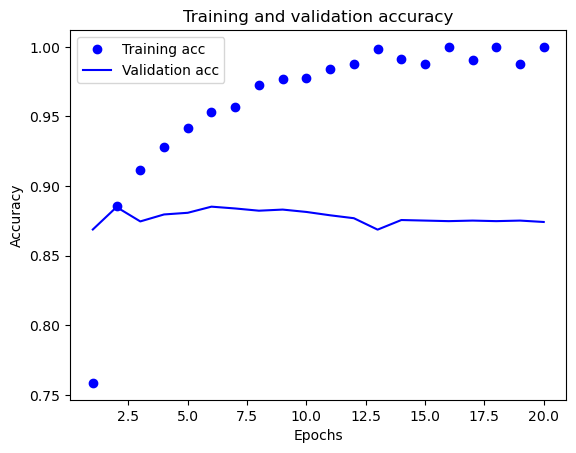

In [82]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [83]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

In [84]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=2,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/2
30/30 [==============================] - 1s 21ms/step - loss: 0.5122 - acc: 0.7663 - val_loss: 0.3543 - val_acc: 0.8752
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.3010 - acc: 0.8881 - val_loss: 0.2884 - val_acc: 0.8885


In [86]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 810us/step - loss: 0.2999 - acc: 0.8823


[0.2999005615711212, 0.882319986820221]

---------------

3. binary_crossentropy 대신 mse 손실 함수를 사용해보자.

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1837 - acc: 0.7675 - val_loss: 0.1432 - val_acc: 0.8280
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1063 - acc: 0.8864 - val_loss: 0.0998 - val_acc: 0.8803
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0782 - acc: 0.9132 - val_loss: 0.0895 - val_acc: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0638 - acc: 0.9304 - val_loss: 0.0846 - val_acc: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0540 - acc: 0.9409 - val_loss: 0.0874 - val_acc: 0.8824
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0474 - acc: 0.9486 - val_loss: 0.0839 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0403 - acc: 0.9587 - val_loss: 0.0872 - val_acc: 0.8819
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0362 - acc: 0.

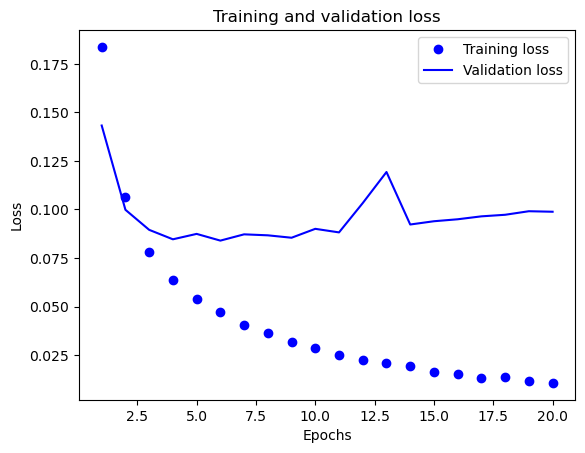

In [90]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics='acc')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

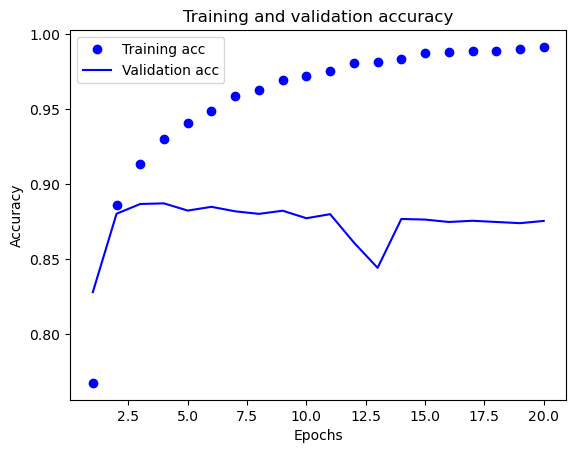

In [91]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics='acc')

model.fit(partial_x_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(x_val, y_val))

model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 1s 16ms/step - loss: 0.1851 - acc: 0.7671 - val_loss: 0.1394 - val_acc: 0.8448
Epoch 2/4
30/30 [==============================] - 0s 9ms/step - loss: 0.1088 - acc: 0.8866 - val_loss: 0.1027 - val_acc: 0.8784
Epoch 3/4
30/30 [==============================] - 0s 9ms/step - loss: 0.0807 - acc: 0.9113 - val_loss: 0.0920 - val_acc: 0.8834
Epoch 4/4
782/782 [==============================] - 1s 763us/step - loss: 0.1031 - acc: 0.8619


[0.10305329412221909, 0.8619199991226196]

---------------

4. relu 대신 tanh 활성화 함수를 사용해보자.

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4822 - acc: 0.7953 - val_loss: 0.3707 - val_acc: 0.8624
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2859 - acc: 0.9011 - val_loss: 0.2913 - val_acc: 0.8858
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2103 - acc: 0.9266 - val_loss: 0.2867 - val_acc: 0.8822
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1645 - acc: 0.9439 - val_loss: 0.2785 - val_acc: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1323 - acc: 0.9565 - val_loss: 0.2953 - val_acc: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1123 - acc: 0.9613 - val_loss: 0.3183 - val_acc: 0.8810
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0864 - acc: 0.9719 - val_loss: 0.3470 - val_acc: 0.8788
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0686 - ac

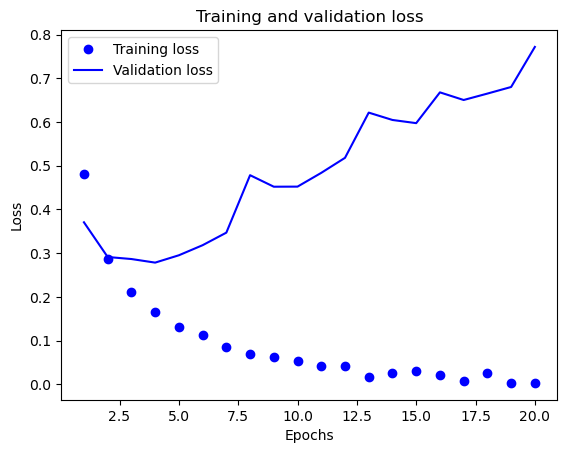

In [93]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = keras.Sequential([
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

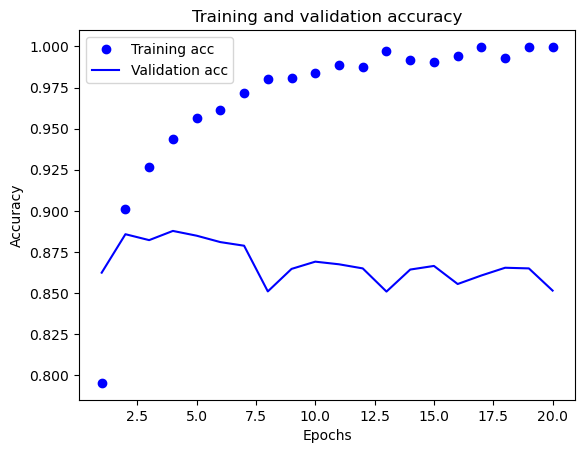

In [94]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
model = keras.Sequential([
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

model.fit(partial_x_train,
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(x_val, y_val))

model.evaluate(x_test, y_test)

Epoch 1/3
30/30 [==============================] - 1s 15ms/step - loss: 0.4910 - acc: 0.7944 - val_loss: 0.3637 - val_acc: 0.8688
Epoch 2/3
30/30 [==============================] - 0s 8ms/step - loss: 0.2885 - acc: 0.8997 - val_loss: 0.2908 - val_acc: 0.8858
Epoch 3/3
782/782 [==============================] - 1s 766us/step - loss: 0.2978 - acc: 0.8748


[0.29781442880630493, 0.8748000264167786]

## 4-2. 뉴스 기사 분류: 다중 분류 문제

**단일 레이블**(single-label) : 정치, 체육, 문화 등등  
**다중 레이블**(multi-label) : (경제, 정치), (부동산, 교통) 등등  
  
이처럼 **각 데이터 포인트가 여러 개의 범주(토픽)에 속할 수 있다면** 이것은 **다중 레이블 다중 분류**(multiclass classification) 문제가 된다.

### 4-2-1. 로이터 데이터 셋

In [7]:
# 로드하기
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 가장 자주 등장하는 단어 1만 개로 제한

2110848/2110848 [==============================] - 1s 0us/step


In [8]:
len(train_data)

8982

In [9]:
len(test_data)

2246

In [10]:
train_data[0] # 각 샘플은 정수 리스트(단어 인덱스)

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

### 4-2-2. 데이터 준비

In [12]:
# 데이터 인코딩 : 벡터화
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### 레이블을 벡터로 바꾸는 두 가지 방법
- 정수 텐서로 변환
- 원-핫 인코딩 : 각 레이블의 인덱스 자리는 1이고, 나머지는 모두 0인 벡터<br>  
<br>
케라스에는 이를 위한 내장 함수가 있음

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 4-2-3. 모델 구성

In [15]:
# 모델 정의하기
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [16]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='acc')

### 4-2-4. 훈련 검증

In [17]:
x_val = x_train[:1000]
y_val = y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.6894 - acc: 0.4835 - val_loss: 1.8166 - val_acc: 0.6180
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5459 - acc: 0.6720 - val_loss: 1.4038 - val_acc: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1961 - acc: 0.7375 - val_loss: 1.2053 - val_acc: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9823 - acc: 0.7899 - val_loss: 1.0965 - val_acc: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8162 - acc: 0.8217 - val_loss: 1.0183 - val_acc: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6838 - acc: 0.8468 - val_loss: 0.9741 - val_acc: 0.7800
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5720 - acc: 0.8746 - val_loss: 0.9487 - val_acc: 0.8030
Epoch 8/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4850 - a

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

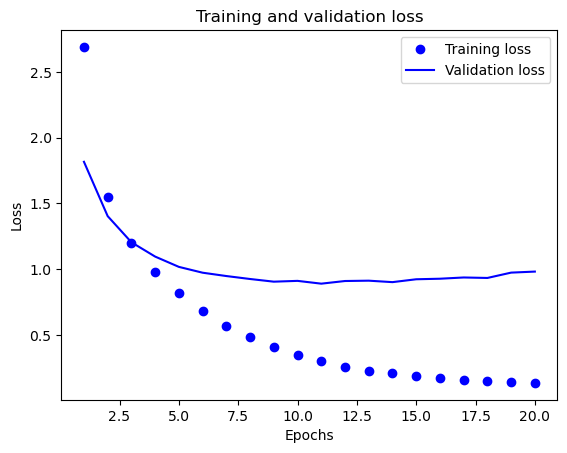

In [23]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

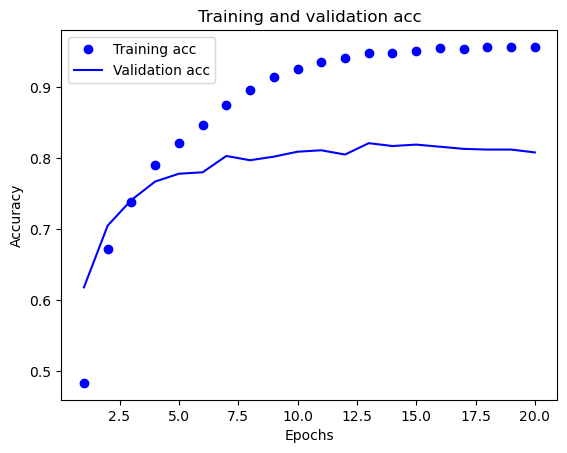

In [24]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='acc')

In [27]:
model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 0s 10ms/step - loss: 2.7134 - acc: 0.5171
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 1.5073 - acc: 0.6828
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.1737 - acc: 0.7423
Epoch 4/9
18/18 [==============================] - 0s 10ms/step - loss: 0.9581 - acc: 0.7902
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.7920 - acc: 0.8268
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6588 - acc: 0.8595
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 0.5482 - acc: 0.8840
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4543 - acc: 0.9045
Epoch 9/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3819 - acc: 0.9192


In [28]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 946us/step - loss: 0.9017 - acc: 0.7916


### 4-2-5. 새로운 데이터에 대해 예측하기

In [29]:
preds = model.predict(x_test)
preds[0].shape

71/71 [==============================] - 0s 921us/step


(46,)

이 벡터는 **확률 분포를 나타내기 때문에 원소를 모두 더하면 1이 된다.**

In [30]:
np.sum(preds[0])

1.0

가장 큰 값이 예측 클래스가 된다. 즉, 가장 확률이 높은 클래스이다.

In [31]:
np.argmax(preds[0])

3

### 4-2-6. 레이블과 손실을 다루는 다른 방법

정수 텐서로 변환  

In [32]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 방식을 사용하려면 손실 함수 하나만 바꾸면 된다.  
categorical_crossentropy 손실함수는 레이블이 범주형 인코딩되어 있을 것으로 기대한다.  
정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용한다.

In [34]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='acc')

### 4-2-7. 충분히 큰 중간층을 두어야 하는 이유

In [35]:
# 정보 병목이 있는 모델
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='acc')

model.fit(x_train, y_train, epochs=9, batch_size=512)

model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 10ms/step - loss: 3.4320 - acc: 0.2069
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 2.8858 - acc: 0.2405
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 2.5527 - acc: 0.2850
Epoch 4/9
18/18 [==============================] - 0s 10ms/step - loss: 2.2283 - acc: 0.3236
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 1.9081 - acc: 0.3456
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 1.6256 - acc: 0.5212
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 1.4270 - acc: 0.6800
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 1.2945 - acc: 0.6898
Epoch 9/9
71/71 [==============================] - 0s 972us/step - loss: 1.3791 - acc: 0.6683


[1.3790702819824219, 0.6682991981506348]

검증 정확도의 최고값 등이 감소되었음을 알 수 있다.  
이런 손실의 원인 대부분은 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다.  
이 모델은 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했다.